In [1]:
import import_data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
businesses = import_data.import_businesses()
busicat = businesses['categories']

In [3]:
# all categories are lists, simply put them all together
l = []
for entry in busicat:
    l += entry

# drop duplicates by converting to set
cats = set(l)
    

In [4]:
data = busicat.apply(lambda x: pd.Series(1, index=x))

In [5]:
datalist = []
max = len(cats)
i = 0
for cat in cats:
    i += 1
    if not(i % 50):
        print('%i von %i' % (i, max))
    datalist.append(data[data[cat]==1].count())

50 von 783
100 von 783
150 von 783
200 von 783
250 von 783
300 von 783
350 von 783
400 von 783
450 von 783
500 von 783
550 von 783
600 von 783
650 von 783
700 von 783
750 von 783


In [6]:
mapdata = dict(zip(cats, datalist))
map = pd.DataFrame(mapdata)

In [7]:
# Normalizing
normal_list = []
for x in datalist:
    normal_list.append(x/x.max())
    
norm_mapdata = dict(zip(cats, normal_list))
norm_map = pd.DataFrame(norm_mapdata)

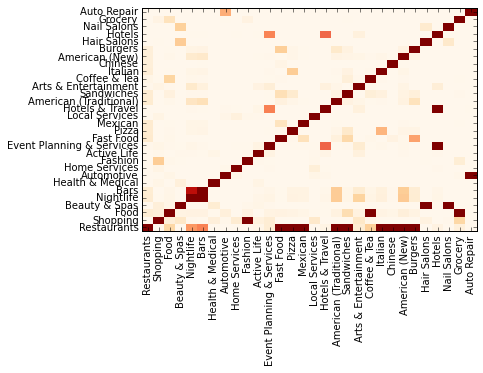

In [8]:
# Get 20 most frequently used categories
sel = data.count().order(ascending=False)[0:30].index

df = norm_map.loc[sel][sel]

plt.pcolor(df, cmap='OrRd')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation='vertical')
plt.show()

In [9]:
# Idee: Überbegriffe finden: z.b. restaurant gibt es in vielen kombinationen, fast food aber nur mit restaurant

In [10]:
"""df = norm_map
dft = norm_map.transpose()
# pd.DataFrame(dft.values/df.values, columns=df.columns, index=df.index)
 
results = {}
for cat in cats:
    # Minus 1 wegen selbstreferenzierung
    results[cat] = {
        'in': (dft.sum()[cat]-1),
        'out': (df.sum()[cat]-1)
    }
    
ratio = pd.DataFrame(results) 
#ratio.order(ascending=False)"""

"df = norm_map\ndft = norm_map.transpose()\n# pd.DataFrame(dft.values/df.values, columns=df.columns, index=df.index)\n \nresults = {}\nfor cat in cats:\n    # Minus 1 wegen selbstreferenzierung\n    results[cat] = {\n        'in': (dft.sum()[cat]-1),\n        'out': (df.sum()[cat]-1)\n    }\n    \nratio = pd.DataFrame(results) \n#ratio.order(ascending=False)"

In [11]:
newmap = map

In [12]:
newmap[newmap>1]=1

In [14]:
import networkx as nx
dt = list(zip(cats, [int]*len(cats)))
graph = nx.from_numpy_matrix(newmap.values, dtype=dt)
nx.write_gml(graph,"test.gml")

In [15]:
dt=[('weight',float),('cost',int)]
A=np.matrix([[(1.0,2)]],dtype=dt)

In [31]:
dt = list(zip(cats, [int]*len(cats)))

In [30]:
res

[('Shutters', int),
 ('Golf Equipment', int),
 ('Handyman', int),
 ('Medical Transportation', int),
 ('Landscape Architects', int),
 ('Burgers', int),
 ('Casinos', int),
 ('CPR Classes', int),
 ('Brazilian', int),
 ('Community Service/Non-Profit', int),
 ('Cosmetic Dentists', int),
 ('Guest Houses', int),
 ('Security Systems', int),
 ('Tex-Mex', int),
 ('Performing Arts', int),
 ('Car Dealers', int),
 ('Hospitals', int),
 ('Plumbing', int),
 ('Security Services', int),
 ('Pool & Hot Tub Service', int),
 ('Sports Clubs', int),
 ('Brasseries', int),
 ('Dog Walkers', int),
 ('Beaches', int),
 ('Pet Adoption', int),
 ('Furniture Repair', int),
 ('Skating Rinks', int),
 ('Hair Extensions', int),
 ('Mailbox Centers', int),
 ('Organic Stores', int),
 ('Creperies', int),
 ('Parking', int),
 ('Hawaiian', int),
 ('Kebab', int),
 ('Career Counseling', int),
 ('Iberian', int),
 ('Italian', int),
 ('Firearm Training', int),
 ('Tattoo Removal', int),
 ('Home Theatre Installation', int),
 ('Rehabilit

In [28]:
cats

{'Accessories',
 'Accountants',
 'Active Life',
 'Acupuncture',
 'Adult',
 'Adult Education',
 'Adult Entertainment',
 'Advertising',
 'Afghan',
 'African',
 'Airlines',
 'Airport Lounges',
 'Airport Shuttles',
 'Airports',
 'Allergists',
 'Amateur Sports Teams',
 'American (New)',
 'American (Traditional)',
 'Amusement Parks',
 'Anesthesiologists',
 'Animal Shelters',
 'Antiques',
 'Apartments',
 'Appliances',
 'Appliances & Repair',
 'Aquarium Services',
 'Aquariums',
 'Arabian',
 'Arcades',
 'Archery',
 'Architects',
 'Argentine',
 'Art Classes',
 'Art Galleries',
 'Art Schools',
 'Art Supplies',
 'Arts & Crafts',
 'Arts & Entertainment',
 'Asian Fusion',
 'Auction Houses',
 'Audiologist',
 'Australian',
 'Austrian',
 'Auto Customization',
 'Auto Detailing',
 'Auto Glass Services',
 'Auto Loan Providers',
 'Auto Parts & Supplies',
 'Auto Repair',
 'Automotive',
 'Baby Gear & Furniture',
 'Baden',
 'Bagels',
 'Bail Bondsmen',
 'Bakeries',
 'Bangladeshi',
 'Bankruptcy Law',
 'Banks & 